In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport


drive.mount('/content/drive')


telecom_data= pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Telco-Customer-Churn.csv")
telecom_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
def data_explore(df):
  dff=pd.DataFrame(df)
  print("data_shape\n",dff.shape)
  print("few rows\n",dff.head())
  print("descriptive statistics\n",df.describe())
  print("info\n",df.info())
  print("check null values\n",df.isnull().sum())
  


In [8]:
'''
profile=ProfileReport(telecom_data,title="report")
profile = ProfileReport(telecom_data, title="report", explorative=True,minimal=True)
profile.to_widgets()
'''

'\nprofile=ProfileReport(telecom_data,title="report")\nprofile = ProfileReport(telecom_data, title="report", explorative=True,minimal=True)\nprofile.to_widgets()\n'

In [9]:
data_explore(telecom_data)

data_shape
 (7043, 21)
few rows
    customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]
descriptive statistics
        SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd415c03450>,
      dtype=object)

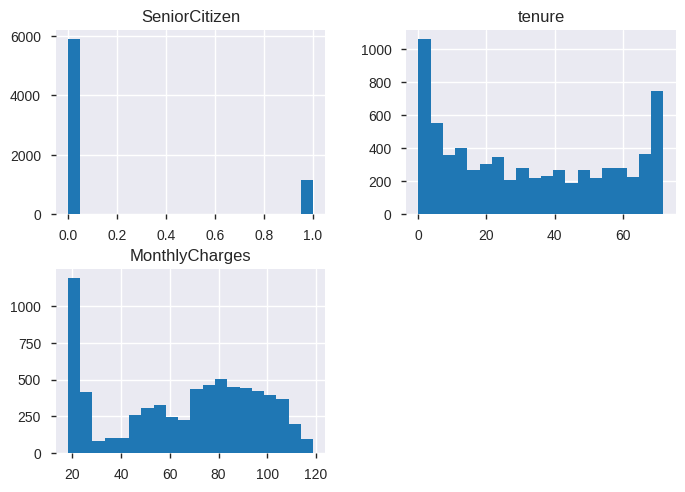

In [10]:
telecom_data.hist(bins=20)

In [11]:
#check for the imbalance so how many are +ve (Yes) and -ve (No) in the dataset
telecom_data['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:

columns=telecom_data.columns
binary_cols=[]
multiple_col_cat=[]
for col in columns:
  #type(telecom_data.gender.value_counts().shape[0])
  if telecom_data[col].value_counts().shape[0]==2:
    binary_cols.append(col)
  else:
    multiple_col_cat.append(col)
  



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

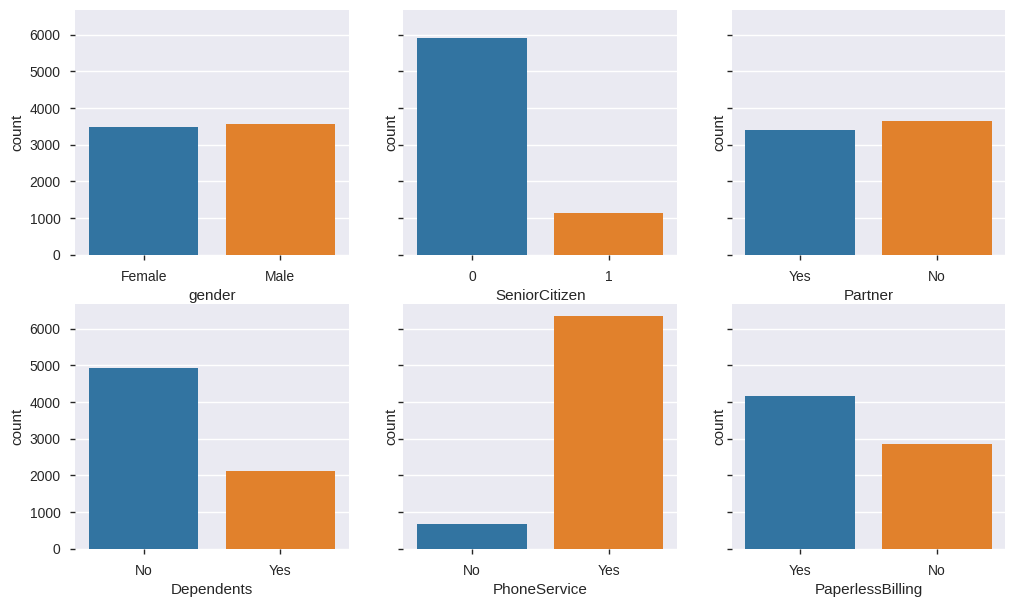

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=telecom_data, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=telecom_data, ax=axes[0,1])
sns.countplot("Partner", data=telecom_data, ax=axes[0,2])
sns.countplot("Dependents", data=telecom_data, ax=axes[1,0])
sns.countplot("PhoneService", data=telecom_data, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=telecom_data, ax=axes[1,2])

#Note: There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.

In [14]:
#lets check how target value will change to respect to its binary features
#sample.housing.map(dict(yes=1, no=0))
#churn_numeric={'Yes':1,'No':0}
#telecom_data.Churn.map(churn_numeric)
churn_numeric = {'Yes':1, 'No':0}
telecom_data.Churn.replace(churn_numeric, inplace=True)

In [15]:
telecom_data[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [16]:
telecom_data[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [17]:
telecom_data[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [18]:
telecom_data[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [19]:
telecom_data[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [20]:
telecom_data[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [21]:
table = pd.pivot_table(telecom_data, values='Churn', index=['gender'],
                    columns=['SeniorCitizen'], aggfunc=np.mean)
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


In [22]:
table = pd.pivot_table(telecom_data, values='Churn', index=['Partner'],
                    columns=['Dependents'], aggfunc=np.mean)
table

Dependents,No,Yes
Partner,,
No,0.342378,0.213296
Yes,0.254083,0.142367


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


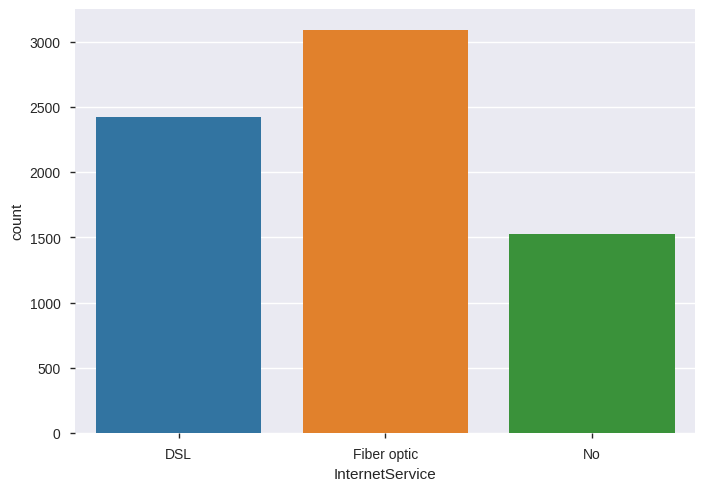

In [23]:
### Other Categorical Features
#Internet Service
sns.countplot("InternetService",data=telecom_data)

In [24]:
telecom_data[['InternetService','Churn']].groupby('InternetService').mean()
#Fiber optic connection has more churn rate as compare to others 


,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [25]:
telecom_data[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

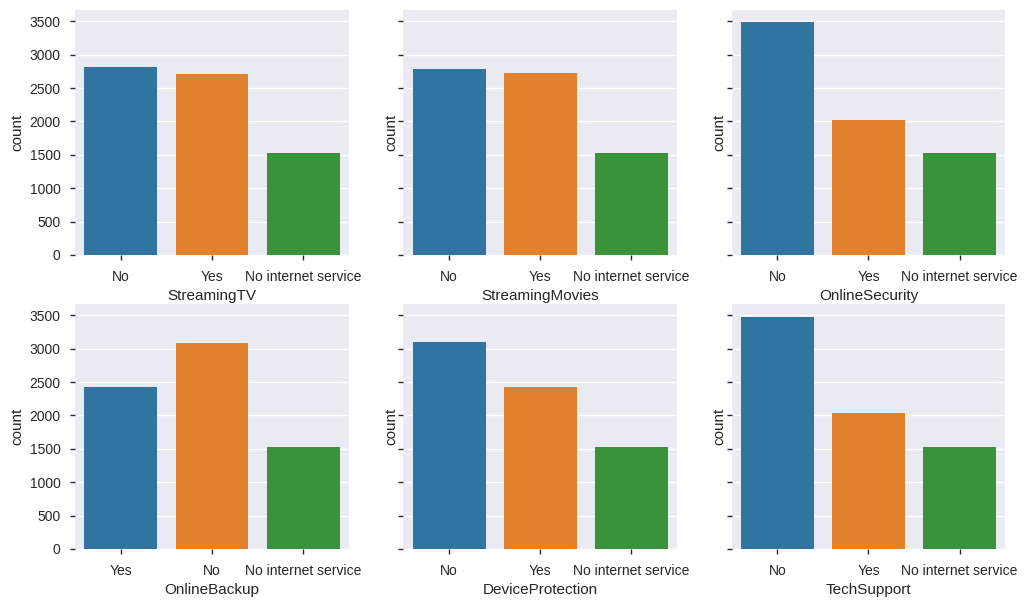

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=telecom_data, ax=axes[0,0])
sns.countplot("StreamingMovies", data=telecom_data, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=telecom_data, ax=axes[0,2])
sns.countplot("OnlineBackup", data=telecom_data, ax=axes[1,0])
sns.countplot("DeviceProtection", data=telecom_data, ax=axes[1,1])
sns.countplot("TechSupport", data=telecom_data, ax=axes[1,2])

In [27]:
telecom_data[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [28]:
telecom_data[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [29]:
telecom_data[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [30]:
telecom_data[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [31]:
telecom_data[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [32]:
telecom_data[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


In [33]:
#All internet service related features seem to have different churn rates for their classes.
telecom_data.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [34]:
telecom_data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [35]:
telecom_data[['MultipleLines','Churn']].groupby('MultipleLines').mean() #phone services and multiple lines has the multicollinearity issues

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


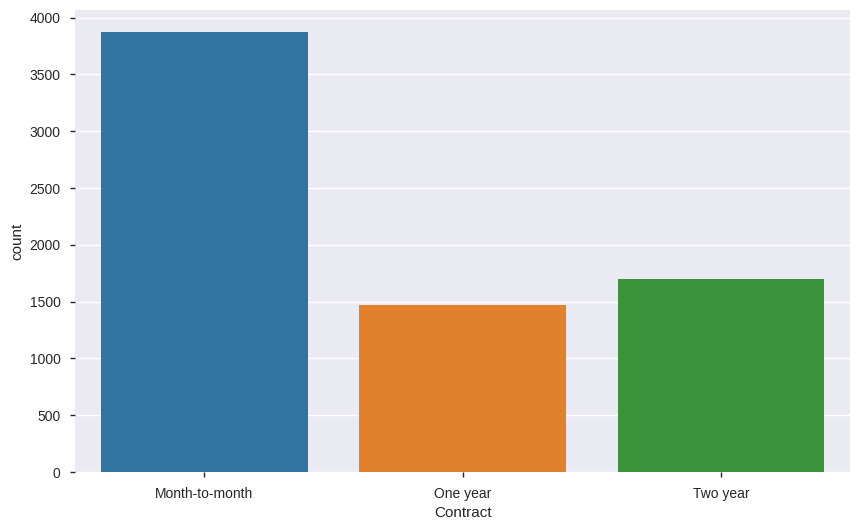

In [36]:
#Contract, Payment Method
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=telecom_data)

In [37]:
telecom_data[['Contract','Churn']].groupby('Contract').mean()
#customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


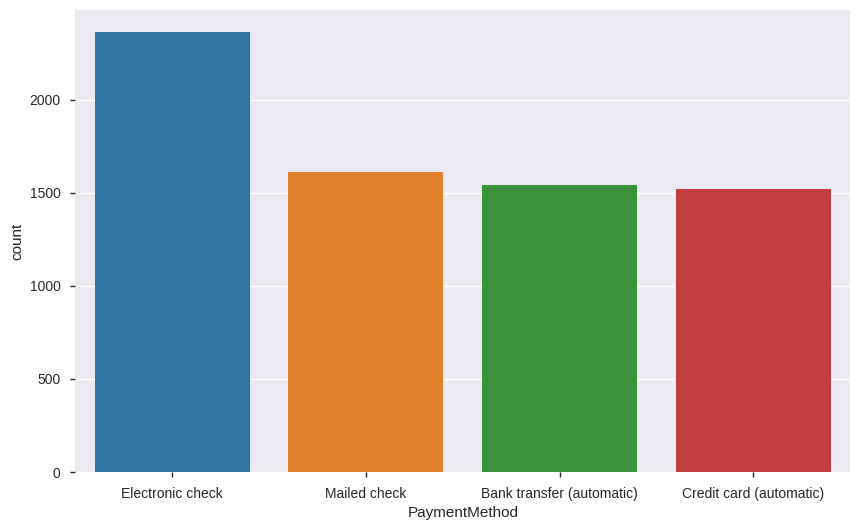

In [38]:
#Payment Method
plt.figure(figsize=(10,6))
sns.countplot('PaymentMethod',data=telecom_data)

In [39]:
telecom_data[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


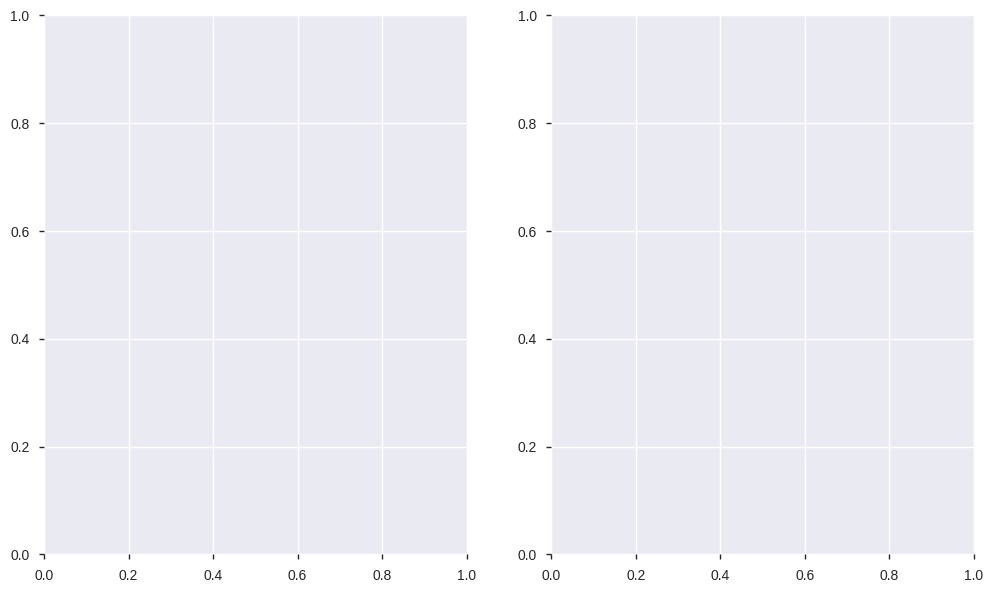

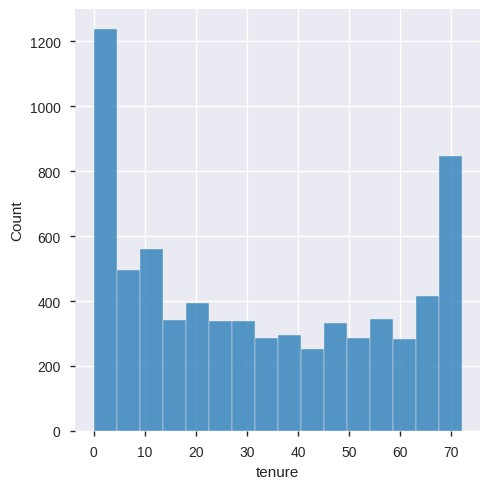

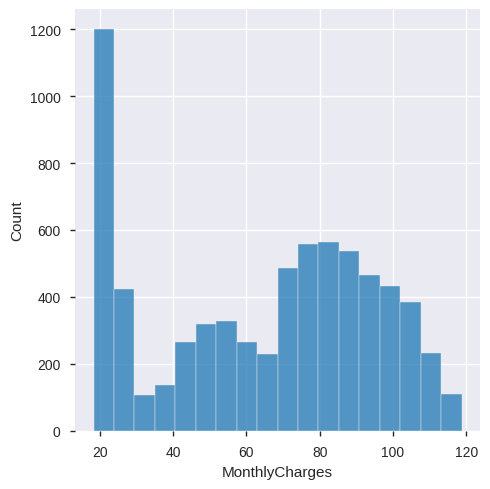

In [40]:
#Continuous Variables 
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.displot(telecom_data['tenure'],ax=axes[0])
sns.displot(telecom_data['MonthlyCharges'],ax=axes[1])

In [41]:
telecom_data[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [42]:
telecom_data[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


### Data Preprocessing


In [43]:

#drop the columns which are not needed /multi-co
telecom_data.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [44]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X=pd.get_dummies(telecom_data,columns=cat_features,drop_first=True) #drop_first = k-1 features will generate
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2,53.85,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2,70.70,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # levelEncoder -- onkind of rank  OneHotEncoder create dummy cols for the same
from sklearn.preprocessing import MinMaxScaler


print(telecom_data.columns)

sc = MinMaxScaler()
a = sc.fit_transform(telecom_data[['tenure']])
b = sc.fit_transform(telecom_data[['MonthlyCharges']])
X['tenure']=a
X['MonthlyCharges']=b
X.head()

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')


,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [46]:
'''
from scipy.stats import norm 

numeric_cols=[feature for feature in telecom_data.columns ]#if telecom_data.dtypes!='object']
#telecom_data["feature"] = pd.to_numeric(telecom_data["feature"])
#for features in telecom_data.columns:
  #telecom_data['feat']
for feature in numeric_cols:
  if feature =='Churn':
    pass
  else:
    #telecom_data[feature].hist()
    #telecom_data["feature"] = pd.to_numeric(telecom_data[feature])
    telecom_data[feature].plot(kind='hist',normed=True)
    plt.xlabel(feature)
    range = np.arange(-4, 4, 0.001)
    plt.plot(range, norm.pdf(range,0,1))
    plt.show()
'''
'''
df.A.plot(kind='hist', normed=True)

range = np.arange(-4, 4, 0.001)
plt.plot(range, norm.pdf(range,0,1))


telecom_data['tenure'].hist()
plt.xlabel('tenure')
plt.show()

'''




"\ndf.A.plot(kind='hist', normed=True)\n\nrange = np.arange(-4, 4, 0.001)\nplt.plot(range, norm.pdf(range,0,1))\n\n\ntelecom_data['tenure'].hist()\nplt.xlabel('tenure')\nplt.show()\n\n"

In [47]:
X.head()

,tenure,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.013889,0.115423,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,0.472222,0.385075,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0.027778,0.354229,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,0.625000,0.239303,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,0.027778,0.521891,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution Before Resampling')

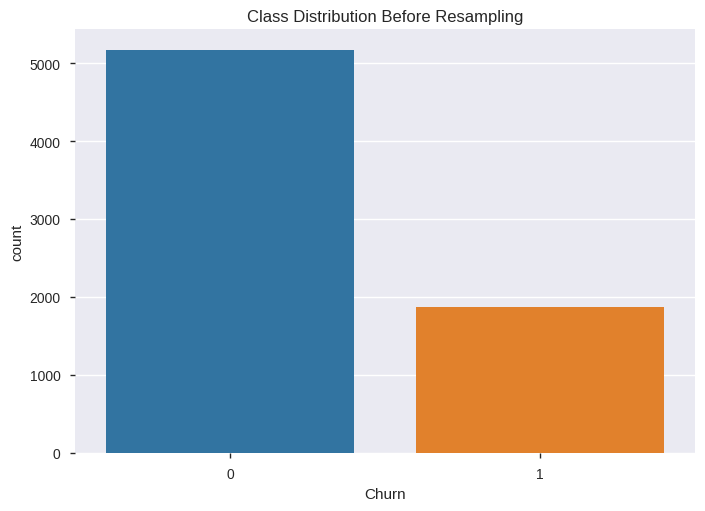

In [48]:
#Check the imbalance problem of the target variable 
sns.countplot('Churn', data=telecom_data).set_title('Class Distribution Before Resampling') 

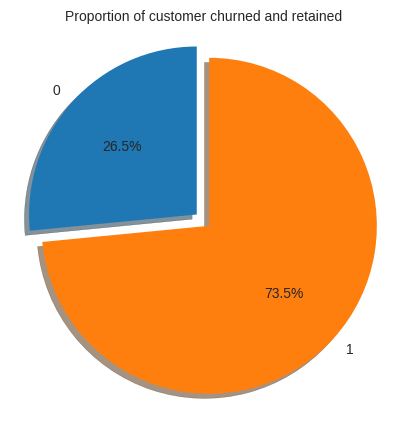

In [49]:
labels = '0', '1'
sizes = [telecom_data.Churn[telecom_data['Churn']==1].count(), telecom_data.Churn[telecom_data['Churn']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 10)
plt.show()

In [50]:
telecom_data.isin(['No']).any()
#df.isin(['bal1']).any()

SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
PaperlessBilling     True
PaymentMethod       False
MonthlyCharges      False
Churn               False
dtype: bool

In [51]:
#upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution After Resampling')

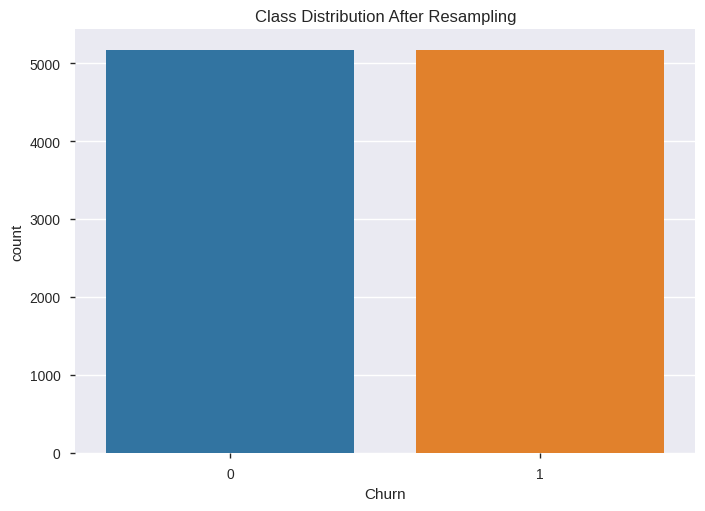

In [52]:
X_yes_upsampled = X_yes.sample(n=len(X_no),replace=True,random_state=50)
len(X_yes_upsampled)
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')


### Model Creation and Evaluation

In [53]:
print(X_upsampled.isin(['No']).any())

tenure                                   False
MonthlyCharges                           False
Churn                                    False
SeniorCitizen_1                          False
Partner_Yes                              False
Dependents_Yes                           False
MultipleLines_No phone service           False
MultipleLines_Yes                        False
InternetService_Fiber optic              False
InternetService_No                       False
OnlineSecurity_No internet service       False
OnlineSecurity_Yes                       False
OnlineBackup_No internet service         False
OnlineBackup_Yes                         False
DeviceProtection_No internet service     False
DeviceProtection_Yes                     False
TechSupport_No internet service          False
TechSupport_Yes                          False
StreamingTV_No internet service          False
StreamingTV_Yes                          False
StreamingMovies_No internet service      False
StreamingMovi

In [54]:
from sklearn.model_selection import train_test_split
print(X_upsampled.columns)
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)



Index(['tenure', 'MonthlyCharges', 'Churn', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [56]:
#Ridge Classifier

from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

ridge_classfier = RidgeClassifier()
ridge_classfier.fit(X_train,y_train)
pred=ridge_classfier.predict(X_train)
accuracy_score(y_train, pred)
print(accuracy_score(y_train,pred))

0.7592413626479826


In [57]:
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)
#Making predictions on training set and evaluating:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8831843440444552

In [58]:
#make the predicition on test 
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8260869565217391

In [59]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
scores = []
best_svr = svm.SVC(kernel='rbf') #
cv = KFold(n_splits=5, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)
 
    X_train,X_test=X.iloc[list(train_index)],X.iloc[list(test_index)]
    y_train,y_test = y.iloc[list(train_index)],y.iloc[list(test_index)]
    
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Train Index:  [ 2070  2071  2072 ... 10345 10346 10347] 

Test Index:  [   0    1    2 ... 2067 2068 2069]
Train Index:  [    0     1     2 ... 10345 10346 10347] 

Test Index:  [2070 2071 2072 ... 4137 4138 4139]
Train Index:  [    0     1     2 ... 10345 10346 10347] 

Test Index:  [4140 4141 4142 ... 6207 6208 6209]
Train Index:  [    0     1     2 ... 10345 10346 10347] 

Test Index:  [6210 6211 6212 ... 8276 8277 8278]
Train Index:  [   0    1    2 ... 8276 8277 8278] 

Test Index:  [ 8279  8280  8281 ... 10345 10346 10347]


In [60]:
best_svr.fit(X_train, y_train)
scores.append(best_svr.score(X_test, y_test))
print(np.mean(scores))
print(cross_val_score(best_svr, X, y, cv=10))

0.6734331427272777
[0.77391304 0.77004831 0.75942029 0.78550725 0.77777778 0.76521739
 0.77487923 0.78357488 0.7794971  0.78433269]
